Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
# 1) Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
car_types_non_clean_fuel = non_clean_fuel_cars[['Make', 'Model']]
print("list of all the cars and their types that do not qualify for clean alternative fuel vehicle: \n",car_types_non_clean_fuel)

list of all the cars and their types that do not qualify for clean alternative fuel vehicle: 
           Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]


In [6]:
# 2) Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_car_info_bothell = tesla_cars_bothell[['Make',"City",'Model Year', 'Model',"Electric Vehicle Type"]]

In [7]:
print("\nTESLA cars with model year and model type made in Bothell City:")
print(tesla_car_info_bothell)


TESLA cars with model year and model type made in Bothell City:
         Make     City  Model Year    Model           Electric Vehicle Type
39      TESLA  Bothell        2020  MODEL 3  Battery Electric Vehicle (BEV)
217     TESLA  Bothell        2022  MODEL 3  Battery Electric Vehicle (BEV)
218     TESLA  Bothell        2022  MODEL Y  Battery Electric Vehicle (BEV)
222     TESLA  Bothell        2018  MODEL 3  Battery Electric Vehicle (BEV)
292     TESLA  Bothell        2017  MODEL X  Battery Electric Vehicle (BEV)
...       ...      ...         ...      ...                             ...
129778  TESLA  Bothell        2019  MODEL 3  Battery Electric Vehicle (BEV)
129954  TESLA  Bothell        2021  MODEL 3  Battery Electric Vehicle (BEV)
129976  TESLA  Bothell        2014  MODEL S  Battery Electric Vehicle (BEV)
130295  TESLA  Bothell        2022  MODEL 3  Battery Electric Vehicle (BEV)
130392  TESLA  Bothell        2018  MODEL 3  Battery Electric Vehicle (BEV)

[2407 rows x 5 columns

In [8]:
# 3) Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_high_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
high_range_cars = electric_cars_high_range[['Make', 'Model','Electric Vehicle Type']]

In [9]:
print("\nCars with an electric range of more than 100 and made after 2015:")
print(high_range_cars)


Cars with an electric range of more than 100 and made after 2015:
          Make    Model           Electric Vehicle Type
0        TESLA  MODEL X  Battery Electric Vehicle (BEV)
2        TESLA  MODEL 3  Battery Electric Vehicle (BEV)
4        TESLA  MODEL S  Battery Electric Vehicle (BEV)
12       TESLA  MODEL 3  Battery Electric Vehicle (BEV)
13       TESLA  MODEL 3  Battery Electric Vehicle (BEV)
...        ...      ...                             ...
130417   TESLA  MODEL Y  Battery Electric Vehicle (BEV)
130428  NISSAN     LEAF  Battery Electric Vehicle (BEV)
130432   TESLA  MODEL Y  Battery Electric Vehicle (BEV)
130436   TESLA  MODEL 3  Battery Electric Vehicle (BEV)
130441   TESLA  MODEL X  Battery Electric Vehicle (BEV)

[34066 rows x 3 columns]


In [47]:
electric_vehicle = df['Electric Vehicle Type'].unique()
print(electric_vehicle)

['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


In [48]:
unique_cities = df['City'].unique()
print(len(unique_cities))

657


In [49]:
city_ev_type_distribution = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

In [50]:
city_ev_type_distribution

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,73.0,42.0
Acme,3.0,4.0
Addy,1.0,1.0
Aiea,NaN,1.0
Airway Heights,10.0,8.0
...,...,...
Yacolt,19.0,13.0
Yakima,309.0,162.0
Yarrow Point,102.0,24.0


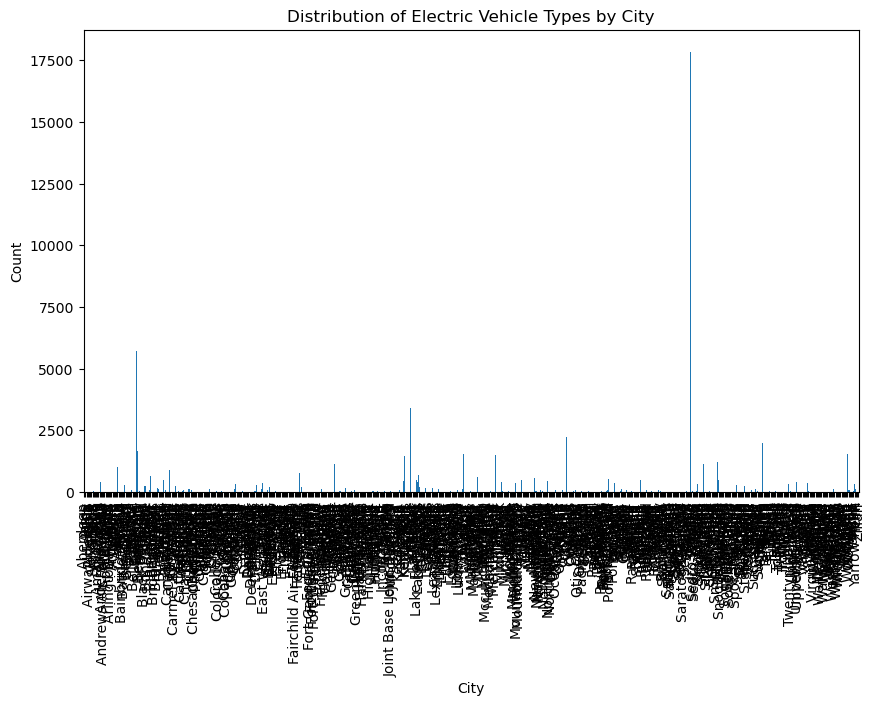

In [43]:
city_ev_type_distribution['Battery Electric Vehicle (BEV)'].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.show()

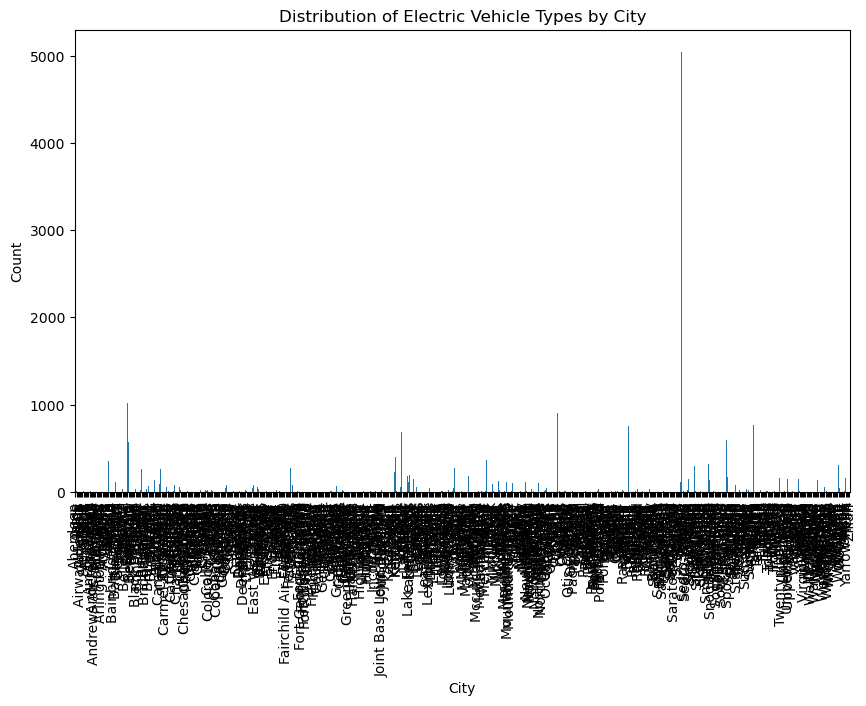

In [46]:
city_ev_type_distribution['Plug-in Hybrid Electric Vehicle (PHEV)'].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.show()